<a href="https://colab.research.google.com/github/siliconemonster/IA-2020.1/blob/main/exerc%C3%ADcio_AlineLarissa_regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Carregando Bibliotecas
import pandas as pd
import numpy as np  # biblioteca que suporta arrays e matrizes multidimensionais - https://numpy.org/
from sklearn import preprocessing # usado para preprocessar a base de dados (normalização)
import matplotlib.pyplot as plt # biblioteca para plotar gráficos
import seaborn as sns # biblioteca de visualização de dados
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos usar o arquivo "exemplo.csv". Inicialmente, carregamos o arquivo e imprimimos o seu conteúdo e plotamos o gráfico.

           X           Y
0  28.816847   60.854133
1  35.757619   67.590670
2  53.821076  110.762773
3  58.215693  115.785785
4  66.809748  125.311129
5  78.252814  149.003866
6  80.648697  159.619414
7  81.296082  157.985286
8  95.724162  197.179636
9  99.958481  196.907397


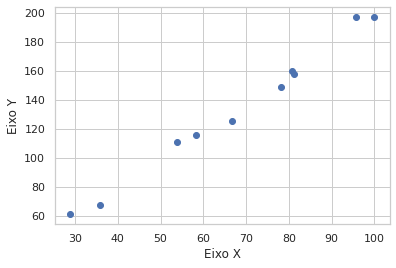

[[28.81684742]
 [35.75761893]
 [53.82107634]
 [58.21569264]
 [66.80974831]
 [78.25281369]
 [80.64869706]
 [81.29608217]
 [95.72416241]
 [99.95848131]]
[[ 60.85413282]
 [ 67.59066954]
 [110.76277271]
 [115.78578459]
 [125.31112852]
 [149.00386554]
 [159.61941373]
 [157.98528569]
 [197.17963609]
 [196.90739698]]


In [16]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('/content/drive/MyDrive/trab_regressão_linear/exemplo.csv',header=0)
print(data)

# gráfico de dispersão - pode usar plt.plot(data['X'],data['Y'],'ro')
plt.scatter(data['X'], data['Y'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.savefig('pontos.png')
plt.show()

# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X = data.iloc[:, 0].values.reshape(-1, 1) 
Y = data.iloc[:, 1].values.reshape(-1, 1) 

print(X)
print(Y)

Vamos agora calcular a reta da regressão linear usando as fórmula apresentadas no vídeo 1 da aula 10:

media X: 67.93012202823
media X²: 5124.991702295573
media Y: 134.10000862119998
media Y²: 19994.15343073811
media X*Y: 10117.850602443814

teta0: -0.08892359520725088
teta1: 1.975396601829183

Equação da Reta: Y = -0.08892359520725088  +  1.975396601829183 * X


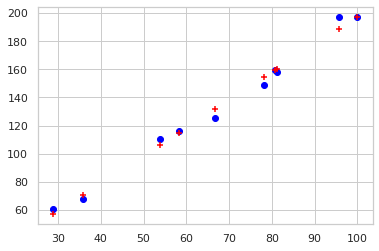

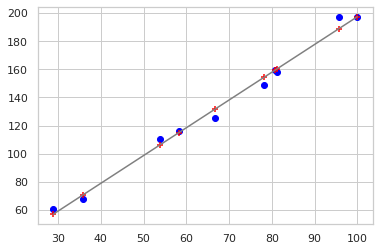

Erro quadrático médio:  19.310387739177273


In [17]:
mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

print('media X:',np.mean(X))
print('media X²:',np.mean(X**2))
print('media Y:',np.mean(Y))
print('media Y²:',np.mean(Y**2))
print('media X*Y:',np.mean(X*Y))
print()
print('teta0:',teta0)
print('teta1:',teta1)
print()
print('Equação da Reta: Y =', teta0,' + ',teta1,'* X' )

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.show()

print("Erro quadrático médio: ", mean_squared_error(Y, Y_pred_media))

<h2>1. Regressão Linear

<h3>a) Refaça o exemplo de regressão linear usando o modelo de regressão linear implementado pelo scikit (linear_model). Indique qual o erro quadrático médio.

Score: 0.9903992477649591
Erro quadrático médio: 19.310387739177337


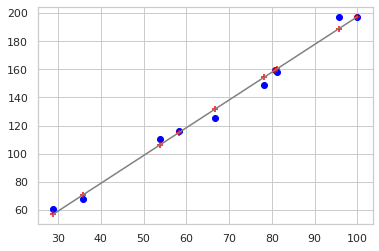

In [18]:
regressao = LinearRegression()
regressao.fit(X, Y)
yPrevisao = regressao.predict(X) # é a linha que indica os valores

plt.scatter(X, Y, color='blue')
plt.scatter(X, yPrevisao,marker='+',color='red')
plt.plot(X, yPrevisao, color='gray')

# O score retorna o coeficiente de determinação R² da previsão (???)
print("Score:", regressao.score(X, Y))
# O erro quadrático médio é quão distante o ponto está da linha
print("Erro quadrático médio:", mean_squared_error(Y, yPrevisao))

<h3>b) Refaça o item (a), dividindo o arquivo de exemplos em treinamento (70%) e teste (30%). Indique qual o erro quadrático médio.

Score: 0.8213507316402394
Erro quadrático médio: 87.34130481275587


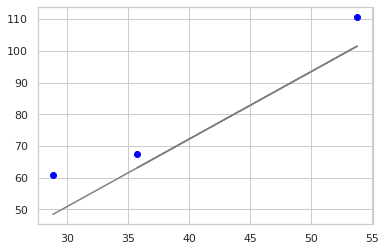

In [19]:
feature_cols = ['X']
X = data[feature_cols]
Y = data.Y

# 70% treinamento - 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Regressão linear
regressao = LinearRegression()
regressao.fit(X_train, Y_train)
yPrevisao = regressao.predict(X_test)

print("Score:", regressao.score(X_test, Y_test))
print("Erro quadrático médio:", mean_squared_error(Y_test, yPrevisao))

# Plotando o gráfico
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, yPrevisao, color='gray')
plt.savefig('reta_prevista.png')
plt.show()

<h3>c) Comente os resultados obtidos.

Em a) O valor do score foi de 0.9903992477649591, o que pareceu muito satisfatório, e o erro quadrático médio foi de 19.310387739177337.<br><br>
Já em b), o score em ambos fica na casa dos 0.99... também, mas sempre variando.
O erro quadrático médio varia muito, aproximadamente de 5 a 25.<br><br>
Julguei esses valores baixos, e por consequência, bons.

<h2>2. Considere a base de dados multi.csv. Ela contém dados com 4 features (X1,X2,X3 e X4) e um atributos alvo (X5).

<h3>a) Plote os gráficos para X1 x X5, X2 x X5, X3 x X5 e X4 x X5, e determine qual par de atributos (Xi,X5) possui uma relação linear.

      X1  X2    X3   X4    X5
0   2017  12  2.75  5.3  1464
1   2017  11  2.50  5.3  1394
2   2017  10  2.50  5.3  1357
3   2017   9  2.50  5.3  1293
4   2017   8  2.50  5.4  1256
5   2017   7  2.50  5.6  1254
6   2017   6  2.50  5.5  1234
7   2017   5  2.25  5.5  1195
8   2017   4  2.25  5.5  1159
9   2017   3  2.25  5.6  1167
10  2017   2  2.00  5.7  1130
11  2017   1  2.00  5.9  1075
12  2016  12  2.00  6.0  1047
13  2016  11  1.75  5.9   965
14  2016  10  1.75  5.8   943
15  2016   9  1.75  6.1   958
16  2016   8  1.75  6.2   971
17  2016   7  1.75  6.1   949
18  2016   6  1.75  6.1   884
19  2016   5  1.75  6.1   866
20  2016   4  1.75  5.9   876
21  2016   3  1.75  6.2   822
22  2016   2  1.75  6.2   704
23  2016   1  1.75  6.1   719
X1 x X5


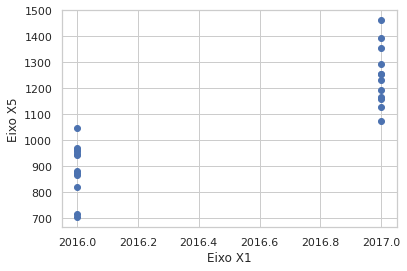


X2 x X5


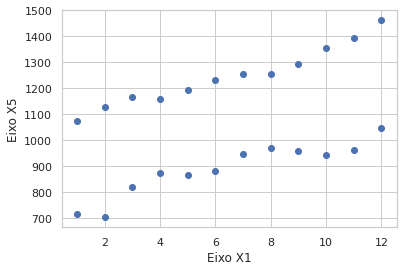


X3 x X5


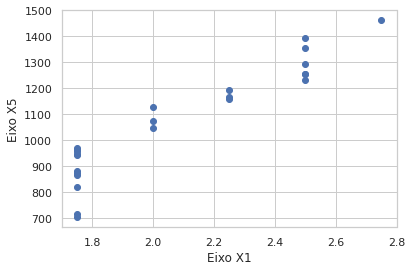


X4 x X5


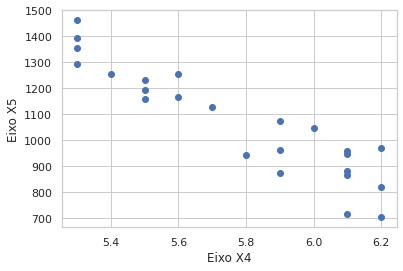

In [20]:
multi = pd.read_csv('/content/drive/MyDrive/trab_regressão_linear/multi.csv',header=0)
print(multi)

print("X1 x X5")
plt.scatter(multi['X1'], multi['X5'])
plt.xlabel("Eixo X1")
plt.ylabel("Eixo X5")
plt.savefig('X1xX5.png')
plt.show()

print()
print("X2 x X5")
plt.scatter(multi['X2'], multi['X5'])
plt.xlabel("Eixo X1")
plt.ylabel("Eixo X5")
plt.savefig('X2xX5.png')
plt.show()

print()
print("X3 x X5")
plt.scatter(multi['X3'], multi['X5'])
plt.xlabel("Eixo X1")
plt.ylabel("Eixo X5")
plt.savefig('X3xX5.png')
plt.show()

print()
print("X4 x X5")
plt.scatter(multi['X4'], multi['X5'])
plt.xlabel("Eixo X4")
plt.ylabel("Eixo X5")
plt.savefig('X4xX5.png')
plt.show()

X4 x X5 parece ter a relação mais linear delas

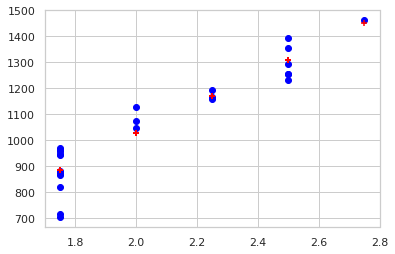

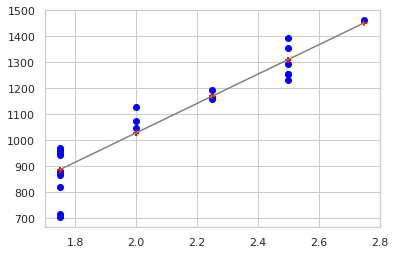

Erro quadrático médio:  5289.701729996911


In [21]:
X = multi.iloc[:, 2].values.reshape(-1, 1) 
Y = multi.iloc[:, 4].values.reshape(-1, 1) 

mediaX  = np.mean(X)
mediaX2 = np.mean(X**2)
mediaY  = np.mean(Y)
mediaY2 = np.mean(Y**2)
mediaXY = np.mean(X*Y)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

# plotando os pontos previstos e a reta
Y_pred_media = teta0+teta1*X

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.show()
print("Erro quadrático médio: ", mean_squared_error(Y, Y_pred_media))

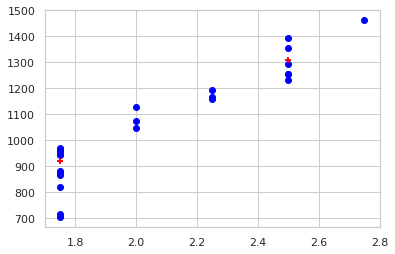

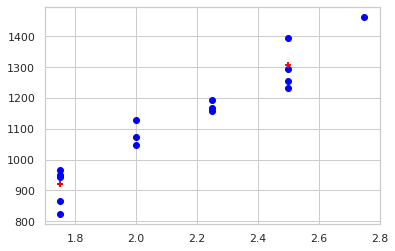

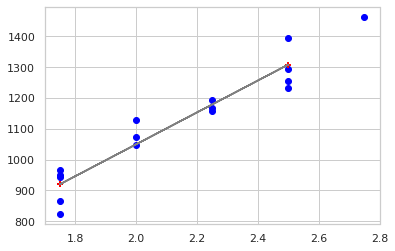

Erro quadrático médio:  12431.158242997057


In [22]:
X = multi.iloc[:, 2].values.reshape(-1, 1) 
Y = multi.iloc[:, 4].values.reshape(-1, 1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

mediaX  = np.mean(X_train)
mediaX2 = np.mean(X_train**2)
mediaY  = np.mean(Y_train)
mediaY2 = np.mean(Y_train**2)
mediaXY = np.mean(X_train*Y_train)

teta0 = (mediaY*mediaX2 - mediaX*mediaXY)/(mediaX2 - (mediaX)**2)
teta1 =(mediaXY - mediaX*mediaY)/(mediaX2 - (mediaX)**2)

Y_pred_media = teta0+teta1*X_test

plt.scatter(X, Y,marker='o',color='blue')  #pontos originais
plt.scatter(X_test, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X_train, Y_train,marker='o',color='blue')  #pontos originais
plt.scatter(X_test, Y_pred_media,marker='+',color='red') #pontos previstos
plt.savefig('pontos_originais_previstos.png')
plt.show()

plt.scatter(X_train, Y_train,marker='o',color='blue')  #pontos originais
plt.scatter(X_test, Y_pred_media,marker='+',color='red') #pontos previstos
plt.plot(X_test, Y_pred_media, color='gray')
plt.savefig('reta_prevista.png')
plt.show()
print("Erro quadrático médio: ", mean_squared_error(Y_test, Y_pred_media))

<h3>b) Utilizando os atributos que possuem uma relação linear com X5, utilize a regressão linear para determinar os coeficientes da equação correspondentes. Utilize o modelo de regressão linear do scikit e todo o conjunto de dados no treinamento.

In [23]:
feature_cols = ['X3', 'X4']
X = multi[feature_cols]
Y = multi.X5

regressao = LinearRegression()
regressao.fit(X, Y)
yPrevisao = regressao.predict(X)
print("Score:", regressao.score(X, Y))
print("Erro quadrático médio:", mean_squared_error(Y, yPrevisao))

Score: 0.8976335894170216
Erro quadrático médio: 4356.611357123124


<h3>c) Divida os dados em conjuntos de  treinamento (75%) e teste (25%).

In [24]:
feature_cols = ['X2', 'X3', 'X4']
X = multi[feature_cols]
Y = multi.X5

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

regressao = LinearRegression()
regressao.fit(X_train, Y_train)
yPrevisao = regressao.predict(X_test)
print("Score: ", regressao.score(X_test, Y_test))
print("Erro quadrático médio: ", mean_squared_error(Y_test, yPrevisao))

Score:  0.8224239065867213
Erro quadrático médio:  7098.411960094621


Links:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
